---

# Exploratory Data Analysis

This notebook is to identify data patterns, trends and relationships between variables, generate visual insights that guide further analysis or business actions.

## Objective
The objective of this notebook is to explore and analyze the hotel booking dataset to identify key trends, patterns, and relationships that influence booking cancellations. The analysis aims to test hypotheses, generate insights that support the business in making data-driven decisions.

## Inputs
- data/clean/hotel_bookings_clean.csv
- Supporting Python libraries for data analysis and visualization

## Outputs
- Summary statistics and visualizations describing the dataset
- Key findings on cancellation drivers and booking characteristics
- Data visualizations for use in the final dashboard and reporting

## Additional Comments
- All analysis steps are documented for clarity and reproducibility.
- Outliers and unusual values were assessed contextually and retained when valid.
- The approach is designed to be flexible for further feature engineering or deeper analysis as new business questions arise.

# Change working directory

The notebooks are stored in a subfolder, so to ensure correct file access when running them, the working directory needs to be changed from the notebook’s current folder to its parent folder. This is managed by accessing the current directory using os.getcwd() and then updating it as needed.

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis\\jupyter_notebooks'

To set the parent folder as the working directory, os.path.dirname() is used to obtain the parent directory and os, and chdir() is used to update the current working directory accordingly.

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis'

# Import neccessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import ttest_ind, chi2_contingency #import statistical test functions

# Read the cleaned file

In [5]:
df = pd.read_csv(os.path.join(current_dir, "data", "clean", "hotel_bookings_clean.csv")) # load the cleaned dataset

---

# Core statistical concepts
Core Statistical Concepts in Data Analysis
1. Mean
The mean (or average) is the sum of all data points divided by the number of points. It provides a central value for the dataset and is widely used for comparison and summarization. 
- mean = (x1 + x2 + ... + xn) / n
- mean in python/pandas is calculated using mean() function
​
2. Median
The median is the middle value in an ordered dataset. If the number of observations is even, it is the average of the two middle values. The median is less affected by outliers than the mean, making it useful for skewed distributions.
- If the number of observations is odd, the median is the middle value.
- If the number of observations is even, the median is the average of the two middle values.
- The median is less affected by outliers than the mean, making it useful for skewed distributions.
- In Pandas it is calculated using .median() function

3. Standard Deviation
Standard deviation measures the dispersion or spread of data points around the mean. A low standard deviation indicates that data points are close to the mean, while a high standard deviation indicates greater variability.
- A low standard deviation means the data points are close to the mean.
- A high standard deviation means the data points are more spread out.
- In pandas the standard deviation is calculated using the .std() function. By default, it computes the sample standard deviation (uses n - 1 in the denominator).

4. Hypothesis Testing
Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data.
Steps Involved:
- Formulate the hypotheses:
- Null hypothesis (H₀): The default assumption (e.g., no effect, no difference).
- Alternative hypothesis (H₁ or Ha): What you want to test for.
- Collect sample data.
- Perform a statistical test (e.g., t-test, chi-square test, ANOVA).
- Decide whether to reject H₀ based on the test statistic and p-value.
Key Point:
- Rejecting H₀ suggests evidence for the alternative hypothesis, while failing to reject H₀ indicates insufficient evidence.

5. Basic Probability
Probability quantifies the likelihood of an event occurring.
- Ranges from 0 (impossible) to 1 (certain).
- Probability theory is the foundation of statistical inference and helps in making predictions under uncertainty.
- Formula (for a simple event) is: number of favorable outcomes / total number of possible outcomes

Why These Concepts Matter
These principles are foundational to data analysis because they:
- Summarize and describe data: Mean, median, and standard deviation help understand the distribution and spread.
- Support comparison and prediction: Probability allows for quantifying uncertainty and making predictions.
- Enable evidence-based decisions: Hypothesis testing helps draw conclusions backed by data.

Bottom line:
Mastering these concepts is essential for extracting meaningful insights and performing robust data analyses.

# Analysis

The custom "review_dataframe(df)" function is used throughout the project to quickly generate a readable summary of any DataFrame. It prints the overall shape, number of duplicate rows, and for each column, displays the data type, count of missing values, number of unique entries, and a sample of values. This approach is very convenient and presents vital information in a user-friendly format, making it easier to understand the structure and quality of the dataset at a glance.

In [6]:
def review_dataframe(df):
    """
    Prints a summary of the dataframe including shape, duplicate count,
    and for each column: type, missing count, unique count, and sample values.
    """
    print(f"shape: {df.shape}") # (rows, columns)
    print(f"duplicates: {df.duplicated().sum()}\n") # count of duplicate rows

    print(f"{'column':<30} {'type':<12} {'missing':<8} {'unique':<8} {'sample values'}")
    print("\n")
    for col in df.columns:
        dtype = df[col].dtype
        missing = df[col].isnull().sum()
        unique_count = df[col].nunique(dropna=True)
        sample_values = df[col].dropna().unique()[:5]
        print(f"{col:<30} {str(dtype):<12} {missing:<8} {unique_count:<8} {sample_values}")

In [7]:
review_dataframe(df)

shape: (80140, 28)
duplicates: 0

column                         type         missing  unique   sample values


hotel                          object       0        2        ['resort_hotel' 'city_hotel']
is_canceled                    bool         0        2        [False  True]
lead_time                      int64        0        478      [ 7 13 14  0  9]
arrival_date_year              int64        0        3        [2015 2016 2017]
arrival_date_month             object       0        12       ['july' 'august' 'september' 'october' 'november']
arrival_date_day_of_month      int64        0        31       [1 2 3 4 5]
weekend_nights                 int64        0        15       [0 1 2 4 3]
week_nights                    int64        0        33       [1 2 3 4 5]
adults                         int64        0        14       [ 1  2  3  4 40]
children                       int64        0        5        [ 0  1  2 10  3]
babies                         int64        0        5        [ 0  1 

Descriptive statistics are generated for key numeric columns using the describe() method. This provides an overview of each variable's distribution, including metrics such as count, mean, standard deviation, minimum, quartiles, and maximum values. Transposing the output improves readability by displaying each feature as a row, making it easier to compare their summary statistics side by side.

In [8]:
df[['lead_time', 'weekend_nights', 'week_nights', 'adults', 'children', 'babies', 'days_waiting', 'total_stay', 'total_guests']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,80140.0,78.003032,83.611666,0.0,12.0,48.0,122.0,709.0
weekend_nights,80140.0,1.021500,1.030984,0.0,0.0,1.0,2.0,16.0
week_nights,80140.0,2.655540,2.046174,0.0,1.0,2.0,4.0,41.0
adults,80140.0,1.889531,0.633810,0.0,2.0,2.0,2.0,55.0
children,80140.0,0.147130,0.469036,0.0,0.0,0.0,0.0,10.0
babies,80140.0,0.011455,0.117025,0.0,0.0,0.0,0.0,10.0
days_waiting,80140.0,0.564737,8.493791,0.0,0.0,0.0,0.0,391.0
total_stay,80140.0,3.677040,2.749877,0.0,2.0,3.0,5.0,57.0
total_guests,80140.0,2.048116,0.806072,0.0,2.0,2.0,2.0,55.0


- Most bookings are made relatively close to the arrival date (median lead time 48 days) but there is a long tail of advance bookings. Stays are generally short (median 3 nights) and involve mainly 2 adults, with very few children or babies. Extreme long stays and rare large parties exist but are uncommon.
- posiible business implications:the dominance of last-minute, small-party bookings suggests hotels should focus on dynamic pricing, last-minute upsells, and flexible staffing for short stays. Extreme long-lead bookings and rare large parties could be analyzed separately for targeted promotions

Identify which numeric features are most correlated with booking cancellations

<Axes: >

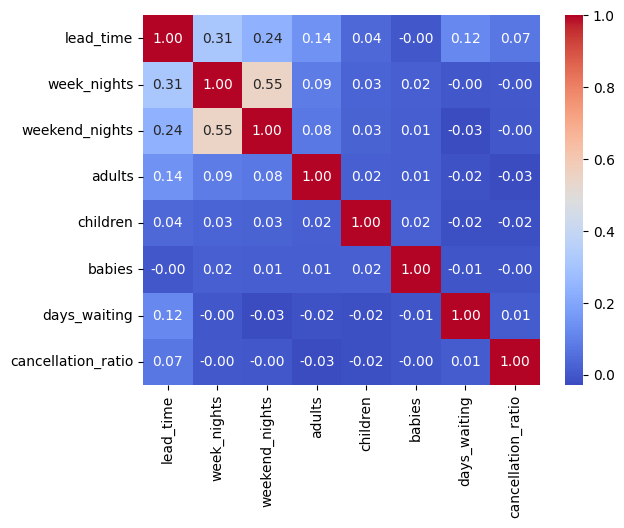

In [9]:
# Correlation matrix and heatmap
numeric_cols = ['lead_time', 'week_nights', 'weekend_nights', 
                'adults', 'children', 'babies', 
                'days_waiting']

corr_matrix = df[numeric_cols + ['cancellation_ratio']].corr() # calculate correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm') # visualize as heatmap

Low correlation values indicate that most numeric variables are not strongly linearly related. Moderate correlations appear between week_nights and weekend_nights, showing that guests who stay during weekdays often extend their stay into weekends. Lead_time shows weak positive correlations with both week_nights and weekend_nights, suggesting that longer planned stays are often booked further in advance. The target variable cancellation_ratio shows very weak correlations with all numeric variables, implying that cancellations are likely influenced more by categorical or behavioral factors rather than stay length or guest count.Correlation only captures linear relationships so other patterns may still exist.

Distribution of lead time and total_stay - lead_time (days in advance the booking was made) and total_stay (weekend_nights + week_nights) are numeric and have many unique values. Visualizing their distributions helps identify booking patterns, long-tail behavior, and outliers.

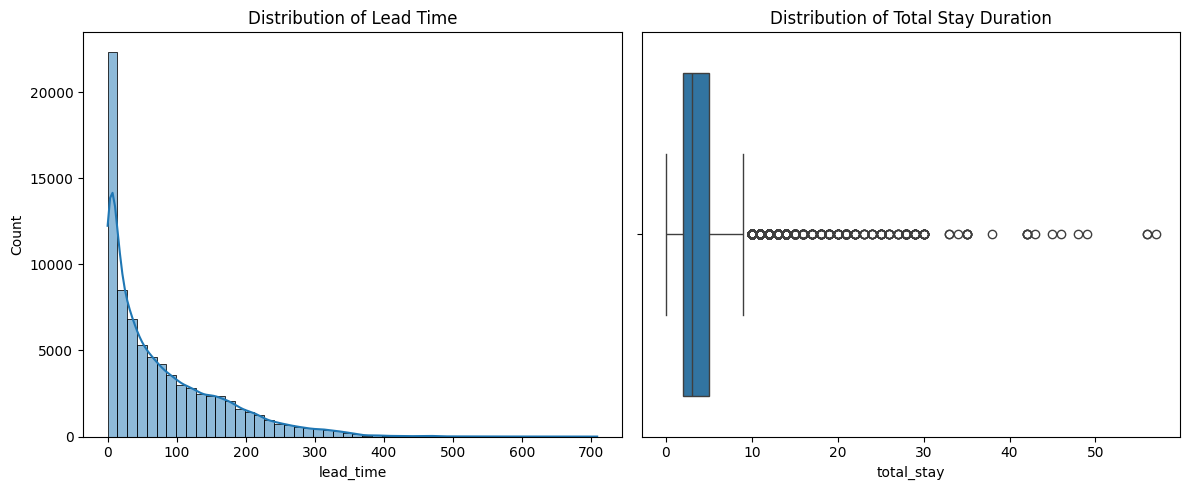

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Lead Time Distribution
sns.histplot(df['lead_time'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Lead Time')

# Right: Total Stay Duration Boxplot
sns.boxplot(x='total_stay', data=df, ax=axes[1])
axes[1].set_title('Distribution of Total Stay Duration')

plt.tight_layout()
plt.show()

The two plots show a heavily right‑skewed lead_time distribution (a large spike at small values and a long tail out to about 700 days) and a total_stay distribution concentrated at short stays with many long-stay outliers. 
What it means for the business: Short lead-time bookings dominate: Demand is often last-minute - to focus on dynamic pricing, last-minute upsells and flexible staffing.
Long lead-time bookings exist: Opportunity for early-booking promotions, deposit/penalty policies, and targeted communication to reduce cancellations.
Stay duration patterns: Most stays are short, with few long-stay outliers - optimize cleaning/staffing for short turnovers and create special packagesor prices for long stays checking if long stays are profitable

Understanding how many bookings get canceled and if this differs by hotel type is a crucial first step in exploring customer behavior.
The next first plot shows the overall cancellation distribution and provids a quick view of the proportion of canceled vs. non-canceled bookings.
The second plot breaks this down by hotel type (city vs. resort) and reveals differences in cancellation behavior across property categories.

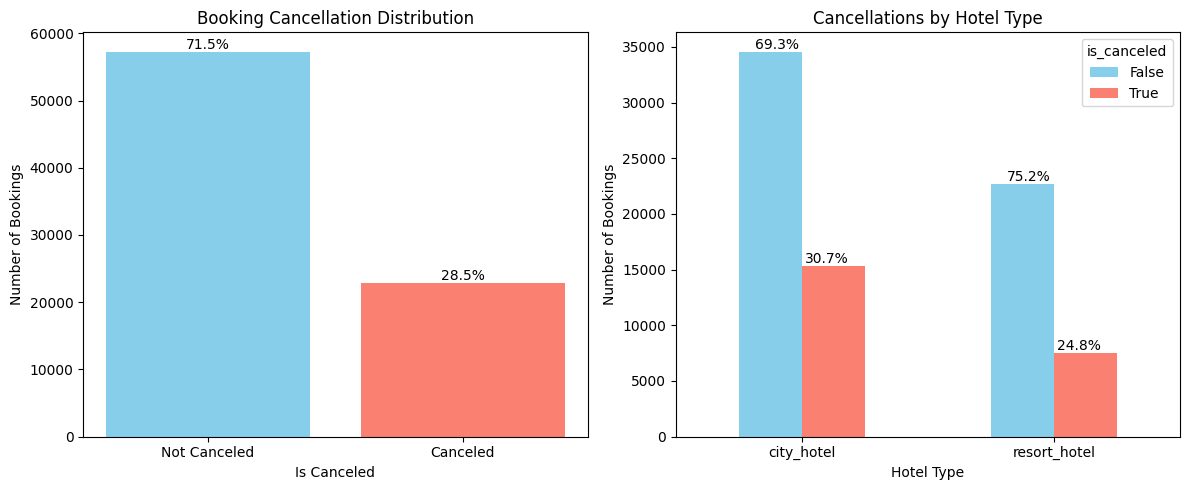

In [11]:
# Plot cancellation distribution and cancellations per hotel on one figure with percentage labels
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Overall cancellation distribution
cancel_counts = df['is_canceled'].value_counts()
bars = axes[0].bar([0, 1], cancel_counts, color=['skyblue', 'salmon'])
axes[0].set_xlabel('Is Canceled')
axes[0].set_ylabel('Number of Bookings')
axes[0].set_title('Booking Cancellation Distribution')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Canceled', 'Canceled'], rotation=0)

# Add percentage labels on top of bars
total = cancel_counts.sum()
for bar, count in zip(bars, cancel_counts):
    percent = f"{count/total:.1%}"
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), percent, ha='center', va='bottom', fontsize=10)

# Right plot: Cancellations per hotel type
hotel_cancel = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)
bars2 = hotel_cancel.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_xlabel('Hotel Type')
axes[1].set_ylabel('Number of Bookings')
axes[1].set_title('Cancellations by Hotel Type')
axes[1].set_xticklabels(hotel_cancel.index, rotation=0)

# Add percentage labels on top of bars for each hotel type
for i, hotel in enumerate(hotel_cancel.index):
    total_hotel = hotel_cancel.loc[hotel].sum()
    for j, canceled in enumerate([False, True]):
        count = hotel_cancel.loc[hotel, canceled]
        percent = f"{count/total_hotel:.1%}"
        axes[1].text(i + (j-0.5)*0.2, count, percent, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

City hotels experience higher cancellation rates compared to resort hotels indicaats that city hotel bookings are more likely to be short stays, business trips or flexible arrangements, while resort bookings are typically longer leisure stays with more committed customers.
!!!to include for the business: City hotels: Need strategies to mitigate cancellations, such as flexible deposit policies, dynamic pricing and targeted promotions for last-minute bookings. Resort hotels: Lower cancellation rates allow for more predictable revenue, enabling stable staffing, inventory planning and upselling packages. Tailoring policies and marketing by hotel type can improve overall revenue management and operational efficiency.

Now I explore how deposit policies influence cancellation behavior.By comparing the percentage of canceled vs. noncanceled bookings across different deposit types I can see whether customers with refundable or no -deposit bookings are more likely to cancel than those who made non refundable deposits.

<Figure size 800x500 with 0 Axes>

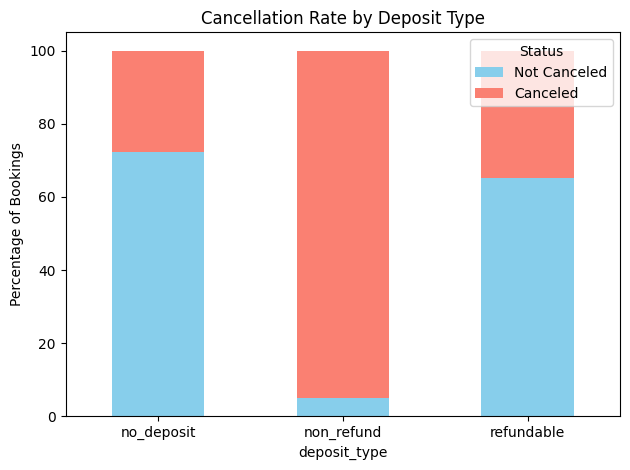

In [12]:
# Plot deposit type vs cancellation rate
plt.figure(figsize=(8, 5))
deposit_cancel = df.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)
deposit_cancel_pct = deposit_cancel.div(deposit_cancel.sum(axis=1), axis=0) * 100

deposit_cancel_pct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.ylabel('Percentage of Bookings')
plt.title('Cancellation Rate by Deposit Type')
plt.legend(['Not Canceled', 'Canceled'], title='Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Normally non-refundable bookings should have lower cancellations so seeing a large number of canceled non-refundable bookings is suspicious. I will investigate further what is the percentage non_refund and canceled bookings 

In [13]:
# Percentage of bookings where is_canceled == True
canceled_pct = (df['is_canceled'].sum() / len(df)) * 100
print(f"% canceled bookings: {canceled_pct:.2f}%")

# Percentage of bookings where deposit_type == 'non_refund' and is_canceled == True
non_refund_canceled = df[(df['deposit_type'] == 'non_refund') & (df['is_canceled'] == True)]
non_refund_canceled_pct = (len(non_refund_canceled) / len(df)) * 100
print(f"% of non_refund & canceled bookings: {non_refund_canceled_pct:.2f}%")

# Percentage of non_refund bookings over (no_deposit + refundable) bookings
non_refund_count = len(df[df['deposit_type'] == 'non_refund'])
no_deposit_refundable_count = len(df[df['deposit_type'].isin(['no_deposit', 'refundable'])])
pct_non_refund_over_no_deposit_refundable = (non_refund_count / no_deposit_refundable_count) * 100
print(f"% non_refund over no_deposit + refundable: {pct_non_refund_over_no_deposit_refundable:.2f}%")

% canceled bookings: 28.51%
% of non_refund & canceled bookings: 1.15%
% non_refund over no_deposit + refundable: 1.22%


The analysis shows that while 28.5% of all bookings are canceled only a small fraction of those come from non-refundable deposits, indicating that guests who commit financially are far less likely to cancel. Since non refundable bookings are just 1.2% of all reservations it suggests that most customers prefer flexibility but this also increases overall cancellation rates.

Demonstrate distribution of Deposit type vs number of bookings with a countlot of seaborn, as it is ideal for visualizing the frequency of categorical variables. Seaborn because it provides a simple, high-level interface for creating attractive, informative statistical graphics. The countplot is perfect here because it automatically counts the number of bookings for each deposit type making it easy to compare their relative prevalence at a glance.

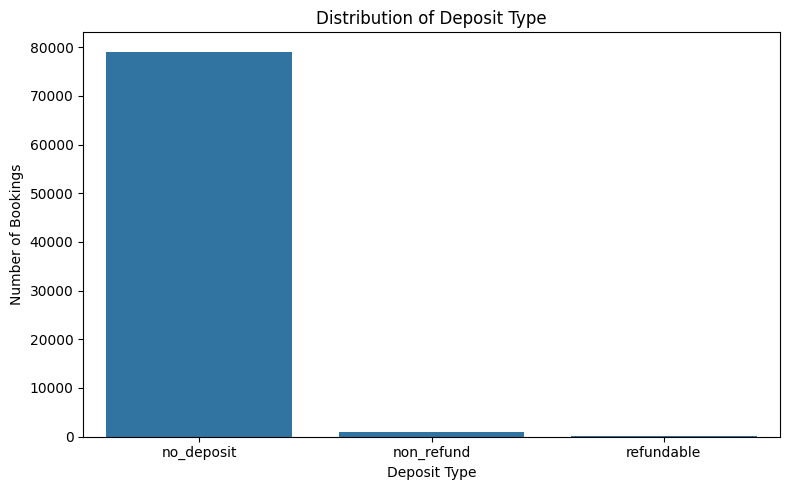

In [14]:
order = df['deposit_type'].value_counts().index

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='deposit_type', data=df, order=order)  # no palette
plt.title('Distribution of Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

The distribution of deposit types reveals a strong dominance of no_deposit. Non refundable and refundable deposits are rarely used and represent only a small fraction of total bookings. This pattern suggests that most guests prefer flexible payment options without upfront commitments — a factor that could contribute to higher cancellation rates overall. 
!!!-- dor the business: explore whether encouraging more non refundable options could help reduce cancellations

# Categorical Variables vs Cancellations

Highlight which categories have higher or lower cancellation probabilities\

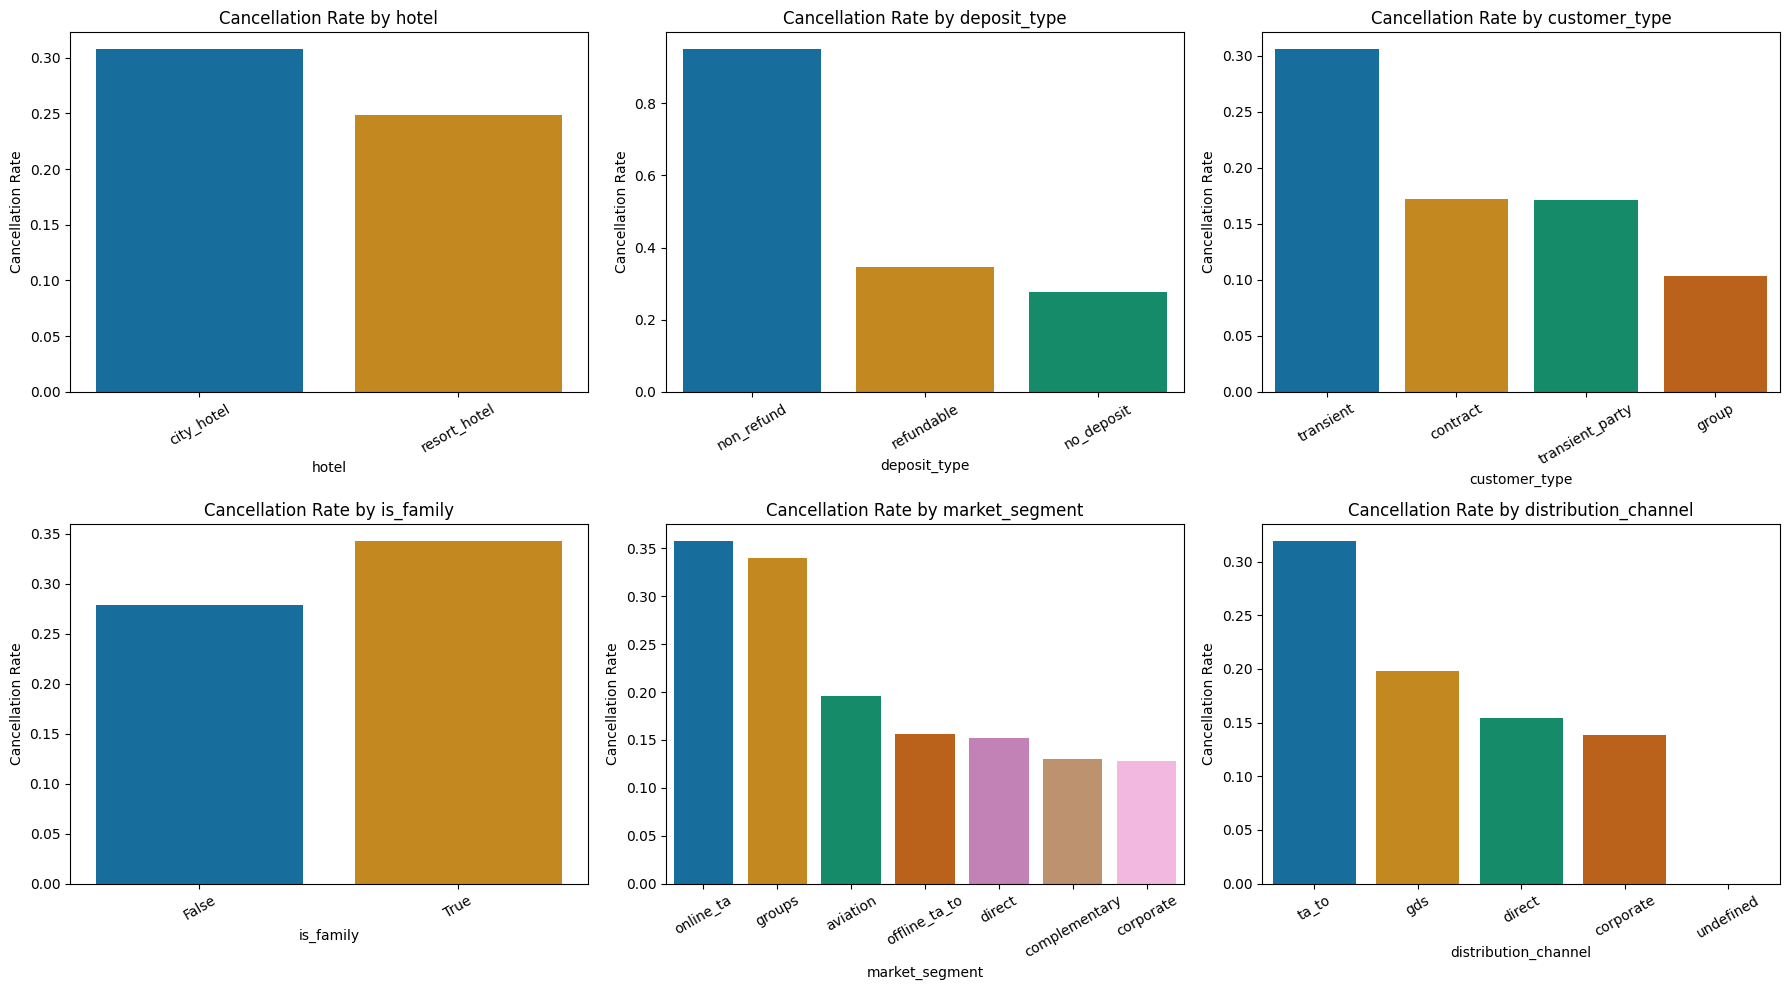

In [15]:
# Compute cancellation rates for key categorical features
categorical_features = [
    'hotel', 'deposit_type', 'customer_type', 'is_family', 'market_segment', 'distribution_channel'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    cancel_rate = df.groupby(feature)['is_canceled'].mean().sort_values(ascending=False)
    plot_df = cancel_rate.reset_index()
    sns.barplot(data=plot_df, x=feature, y='is_canceled', ax=axes[idx], palette='colorblind', hue=feature, legend=False)
    axes[idx].set_title(f'Cancellation Rate by {feature}')
    axes[idx].set_ylabel('Cancellation Rate')
    axes[idx].set_xlabel(feature)
    axes[idx].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Hypotheses - testing and validation

Hypothesis 1: Lead Time vs. Cancellation
- H0: There is no relationship between lead time and the likelihood of booking cancellation.
- H1: Longer lead times are associated with a higher likelihood of booking cancellation.
- Rationale: Customers who book far in advance may have a higher chance of changing their plans or finding alternative options.
- How to Test:chi-square test, compare mean lead time between canceled and non-canceled bookings using a t-test,visualize with boxplots


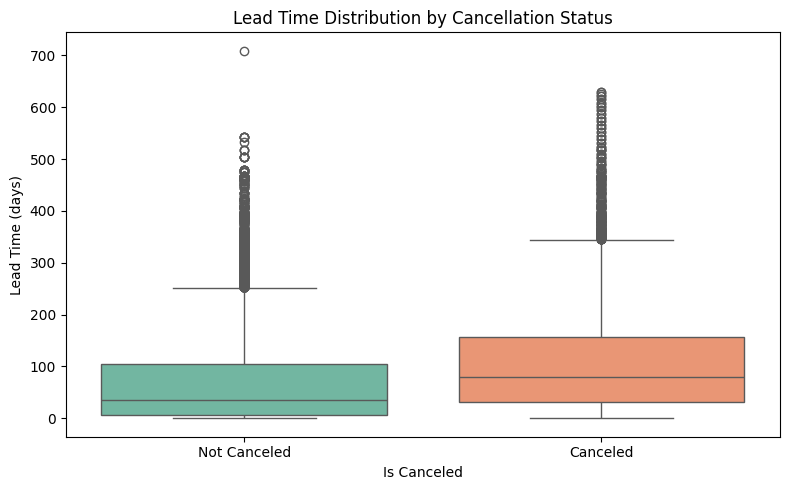

T-test: t-statistic=54.15, p-value=0.0000
Chi-square test: chi2=4835.23, p-value=0.0000


In [16]:
# Compare mean lead time between canceled and non-canceled bookings
lead_time_canceled = df[df['is_canceled']]['lead_time']
lead_time_not_canceled = df[~df['is_canceled']]['lead_time']

# Visualize with boxplots (fix palette warning)
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df, hue='is_canceled', palette='Set2', legend=False)
plt.title('Lead Time Distribution by Cancellation Status')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time (days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

# T-test for mean difference
t_stat, p_val = ttest_ind(lead_time_canceled, lead_time_not_canceled, equal_var=False)
print(f"T-test: t-statistic={t_stat:.2f}, p-value={p_val:.4f}")

# Chi-square test: Bin lead_time and cross-tab with cancellation
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=[-1, 7, 30, 90, 180, 365, df['lead_time'].max()], labels=['<1w', '1w-1m', '1m-3m', '3m-6m', '6m-1y', '>1y'])
contingency = pd.crosstab(df['lead_time_bin'], df['is_canceled'])
chi2, chi_p, _, _ = chi2_contingency(contingency)
print(f"Chi-square test: chi2={chi2:.2f}, p-value={chi_p:.4f}")

Since the p-value is much less than 0.05, Ireject the null hypothesis which means that there is a statistically significant relationship between lead time and booking cancellation. The likelihood of a booking being canceled is associated with the lead time.
There is a statistically significant difference in lead time between canceled and non canceled bookings- bookings made further in advance are more likely to be canceled.

Hypothesis 2: Deposit Type vs. Cancellation
- H0: Cancellation rates are independent of the type of deposit.
- H1: Bookings with refundable or no deposit have higher cancellation rates than non-refundable deposits.
- Rationale: A higher financial commitment (non-refundable deposit) discourages cancellations, while refundable or no-deposit bookings are easier to cancel.
- How to Test: chi-square test of independence between deposit_type and is_canceled, calculate cancellation rates per deposit type, visualize with a bar chart showing percentage canceled per deposit type.

Cancellation rates by deposit type:
deposit_type
non_refund    0.949328
refundable    0.347222
no_deposit    0.276937
Name: is_canceled, dtype: float64


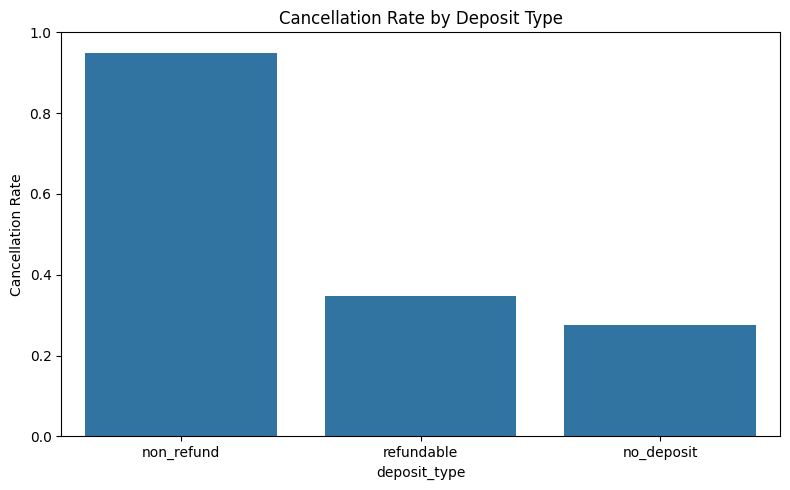

Chi-square test: chi2=2120.40, p-value=0.0000


In [17]:
# Calculate cancellation rates per deposit type
deposit_cancel_rate = df.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation rates by deposit type:")
print(deposit_cancel_rate)

# Visualize with a bar chart showing percentage canceled per deposit type
plt.figure(figsize=(8, 5))
sns.barplot(x=deposit_cancel_rate.index, y=deposit_cancel_rate.values)
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Deposit Type')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Chi-square test of independence between deposit_type and is_canceled
deposit_crosstab = pd.crosstab(df['deposit_type'], df['is_canceled'])
chi2_stat, chi2_p, _, _ = chi2_contingency(deposit_crosstab)
print(f"Chi-square test: chi2={chi2_stat:.2f}, p-value={chi2_p:.4f}")

Cancellation rates differ significantly across deposit types. Non-refundable bookings show an unexpectedly high cancellation rate (94.9%), likely due to the very small number of such bookings in the dataset (1.2% of total), while refundable and no-deposit bookings, which dominate the dataset, show lower cancellation rates (34.7% and 27.7%, respectively). This indicates that most guests prefer flexible payment options, but deposit type still has a statistically significant association with cancellations. For business, strategies to encourage early commitment through partial or non-refundable deposits could help reduce cancellations among flexible customers, while monitoring the small non-refundable segment carefully.

Hypothesis 3: Customer Type vs. Cancellation
- H0: Customer type (transient, group, contract, transient_party) does not affect the probability of cancellation.
- H1: Certain customer types (e.g., transient guests) have higher cancellation rates than others (e.g., contract clients).
- Rationale: Groups or contract clients are more committed to their bookings, while individual or transient guests may cancel more frequently.
- How to Test:chi-square test for independence between customer_type_label and is_canceled, compute cancellation rates per customer type,visualize with stacked bar charts to compare cancellation percentages across customer types.

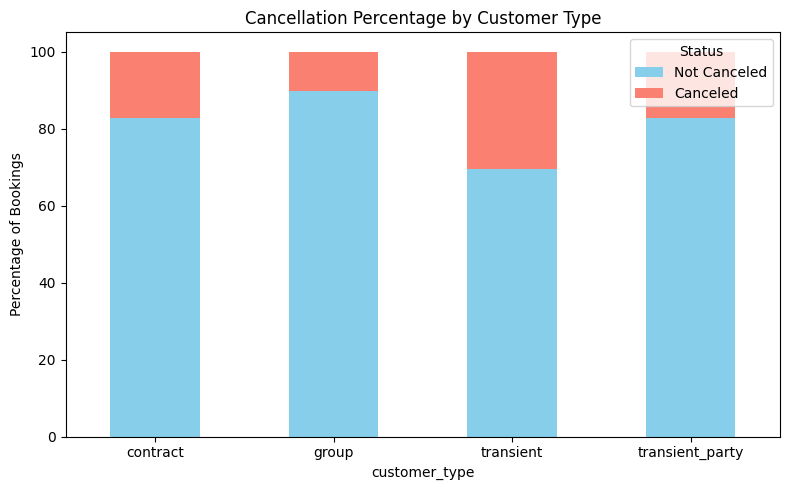

Cancellation rates by customer type:
customer_type
transient          0.305639
contract           0.171870
transient_party    0.171389
group              0.103516
Name: is_canceled, dtype: float64
Chi-square test: chi2=951.32, p-value=0.0000


In [18]:
# Visualize with stacked bar chart (percentage canceled per customer type)
customer_cancel = df.groupby(['customer_type', 'is_canceled']).size().unstack(fill_value=0)
customer_cancel_pct = customer_cancel.div(customer_cancel.sum(axis=1), axis=0) * 100

customer_cancel_pct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 5))
plt.ylabel('Percentage of Bookings')
plt.title('Cancellation Percentage by Customer Type')
plt.legend(['Not Canceled', 'Canceled'], title='Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Compute cancellation rates per customer type
customer_cancel_rate = df.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation rates by customer type:")
print(customer_cancel_rate)

# Chi-square test for independence between customer_type and is_canceled
customer_crosstab = pd.crosstab(df['customer_type'], df['is_canceled'])
chi2_stat, chi2_p, _, _ = chi2_contingency(customer_crosstab)
print(f"Chi-square test: chi2={chi2_stat:.2f}, p-value={chi2_p:.4f}")

Cancellation rates vary significantly across customer types. Transient guests have the highest cancellation rate (30.6%), while contract clients (17.2%), transient parties (17.1%), and group bookings (10.4%) have progressively lower rates. This pattern aligns with expectations: individual or transient bookings are more flexible and easier to cancel, whereas groups and contract clients are more committed due to formal agreements or coordinated planning. The chi-square test confirms a statistically significant association between customer type and cancellations. Hotels can use this insight to tailor policies and marketing strategies by customer type. For example, flexible pricing or targeted reminders may help reduce cancellations among transient guests, while group and contract bookings can be managed with more predictable staffing, inventory, and revenue planning.

Hypothesis 4: Family vs. Cancellation
- H0: Being a family booking (is_family) does not affect the likelihood of cancellation.
- H1: Family bookings are less likely to be canceled compared to non-family bookings.
- Rationale: Families often plan stays in advance and are less likely to cancel compared to individual or transient guests.
- How to Test: chi-square test of independence between is_family and is_canceled, calculate cancellation rates for family vs. non-family bookings,visualize with bar plots showing the proportion of cancellations for families vs. non-families.

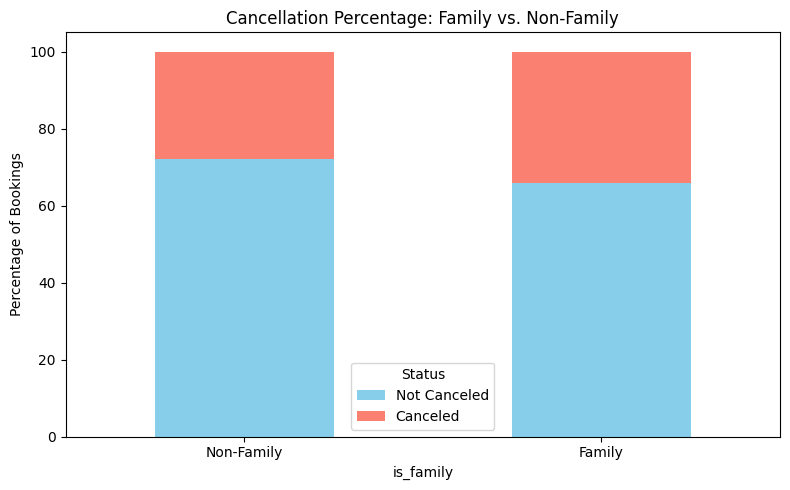

Cancellation rates (is_family=False, is_family=True):
is_family
False    0.278226
True     0.342538
Name: is_canceled, dtype: float64
Chi-square test: chi2=155.20, p-value=0.0000


In [19]:
# Visualize cancellation proportions for family vs. non-family bookings
family_cancel = df.groupby(['is_family', 'is_canceled']).size().unstack(fill_value=0)
family_cancel_pct = family_cancel.div(family_cancel.sum(axis=1), axis=0) * 100

family_cancel_pct.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 5))
plt.ylabel('Percentage of Bookings')
plt.title('Cancellation Percentage: Family vs. Non-Family')
plt.legend(['Not Canceled', 'Canceled'], title='Status')
plt.xticks([0, 1], ['Non-Family', 'Family'], rotation=0)
plt.tight_layout()
plt.show()

# Compute cancellation rates for family vs. non-family bookings
family_cancel_rate = df.groupby('is_family')['is_canceled'].mean()
print("Cancellation rates (is_family=False, is_family=True):")
print(family_cancel_rate)

# Chi-square test for independence between is_family and is_canceled
family_crosstab = pd.crosstab(df['is_family'], df['is_canceled'])
chi2_stat, chi2_p, _, _ = chi2_contingency(family_crosstab)
print(f"Chi-square test: chi2={chi2_stat:.2f}, p-value={chi2_p:.4f}")

Family bookings have a higher cancellation rate (34.3%) compared to non-family bookings (27.8%), despite the expectation that families plan ahead. This likely reflects the coordination challenges and uncertainties involved in family travel. The chi-square test confirms a statistically significant association between family bookings and cancellations. For business, targeted communications such as confirmations, reminders, and incentives for family bookings could help reduce cancellations and improve operational planning.


A heatmap is plotted to visualize patterns and trends in cancellations across two dimensions—year and month—simultaneously. By representing the number of canceled bookings with color intensity, it allows for quick identification of periods with unusually high or low cancellations, making seasonal and temporal patterns immediately apparent.
I used ChatGPT to fix the error because, after restarting the kernel, the variable heatmap_pivot was undefined. ChatGPT did not help and I tried with copilot which resolved the issue.

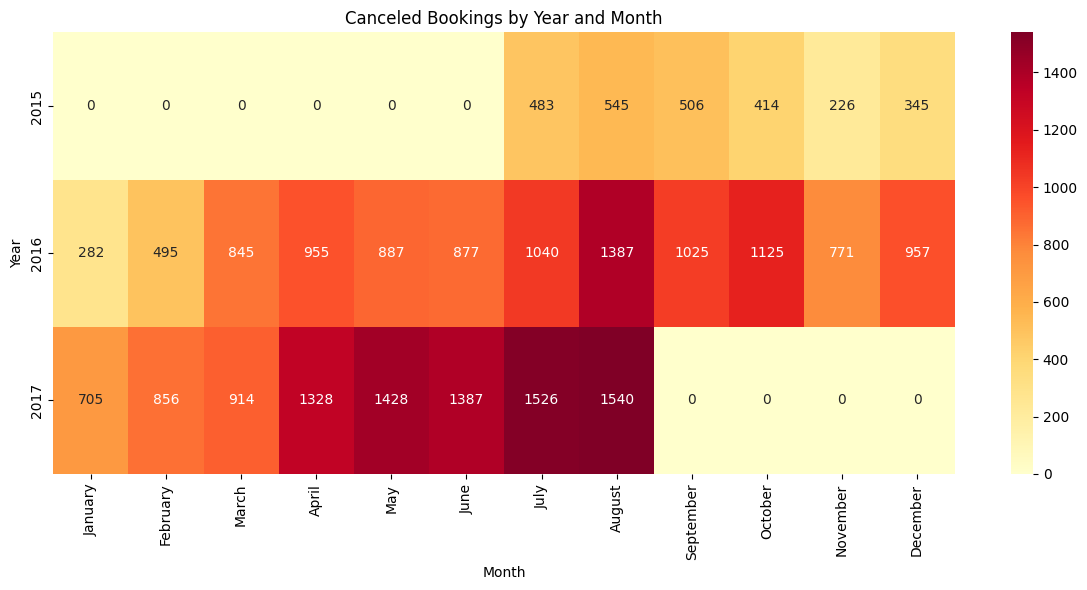

In [24]:
# Extract month name from arrival_date (if not already present)
df['arrival_date_month'] = pd.to_datetime(df['arrival_date'], errors='coerce').dt.strftime('%B')

# Prepare data for heatmap: cancellations by year and month
cancel_by_month = df[df['is_canceled'] == True].groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='canceled_count')

# Ensure months are ordered correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancel_by_month['arrival_date_month'] = pd.Categorical(cancel_by_month['arrival_date_month'], categories=month_order, ordered=True)

# Pivot for heatmap
heatmap_pivot = cancel_by_month.pivot(index='arrival_date_year', columns='arrival_date_month', values='canceled_count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Canceled Bookings by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


The heatmap illustrates that cancellations are most frequent during the summer months, especially in July and August, with August 2017 showing the highest spike. This strong seasonality suggests that hotels experience greater cancellation risk during peak travel periods, likely influenced by factors such as increased demand or external events. The gaps in certain months are due to the dataset’s limited date range. 

---

NOTE

* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---